In [2]:

source("../../R/gen_data.R")
source("../../R/display.R")
source("../../R/metrics.R")
source("../../R/JGL.R")
source("../../R/admm.iters.R")
source("../../R/gete.R")
source("../../R/SSJGL.R")
source("../../R/eval.R")

library(corrplot)
library(Matrix)
 #convert between network and igraph
library(BDgraph)
library(tmvtnorm)
library(binr)

In [139]:
load("../../results/simple_r100_n40_v2/FGL100_simple.RData")
load("../../results/simple_r100_n40_v2/GGL100_simple.RData")
load("../../results/simple_r100_n40_v2/GL100_simple.RData")

replic_size <- length(fgl_roc[[1]]$FPR)
lam1_size   <- dim(fgl_roc[[1]]$FPR[[1]])[1]
lam2_size   <- dim(fgl_roc[[1]]$FPR[[1]])[2]
print(lam2_size)


[1] 20


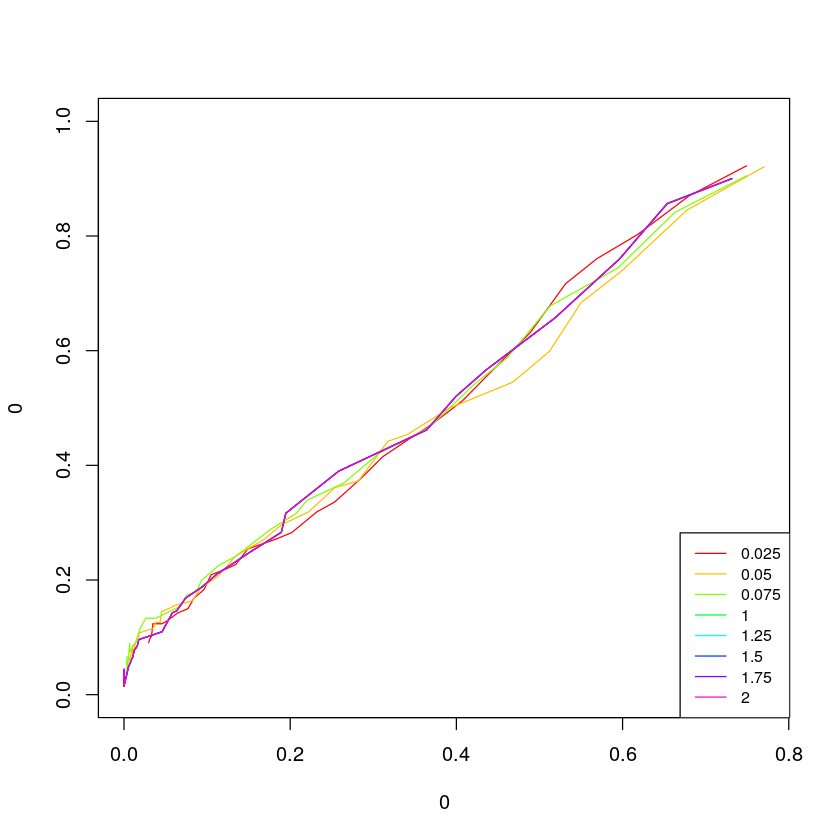

In [129]:
fgl_fpr <- fgl_roc[[1]]$FPR[[1]]
fgl_tpr <- fgl_roc[[1]]$TPR[[1]]
plot(0,0,xlim = c(min(fgl_fpr),max(fgl_fpr)),ylim = c(0.,1.),type = "n")
cl <- rainbow(lam2_size)
for(l2 in 1:lam2_size){
    fpr_sort <- sort(fgl_fpr[,l2])
    tpr_sort <- fgl_tpr[,l2][order(fgl_fpr[,l2])]
    lines(fpr_sort, tpr_sort,type="l",col=cl[l2])
    
}

legend("bottomright", legend=c(.025, .05, .075, 1., 1.25, 1.5, 1.75, 2.0),
       col=c(cl), lty=1, cex=0.8)

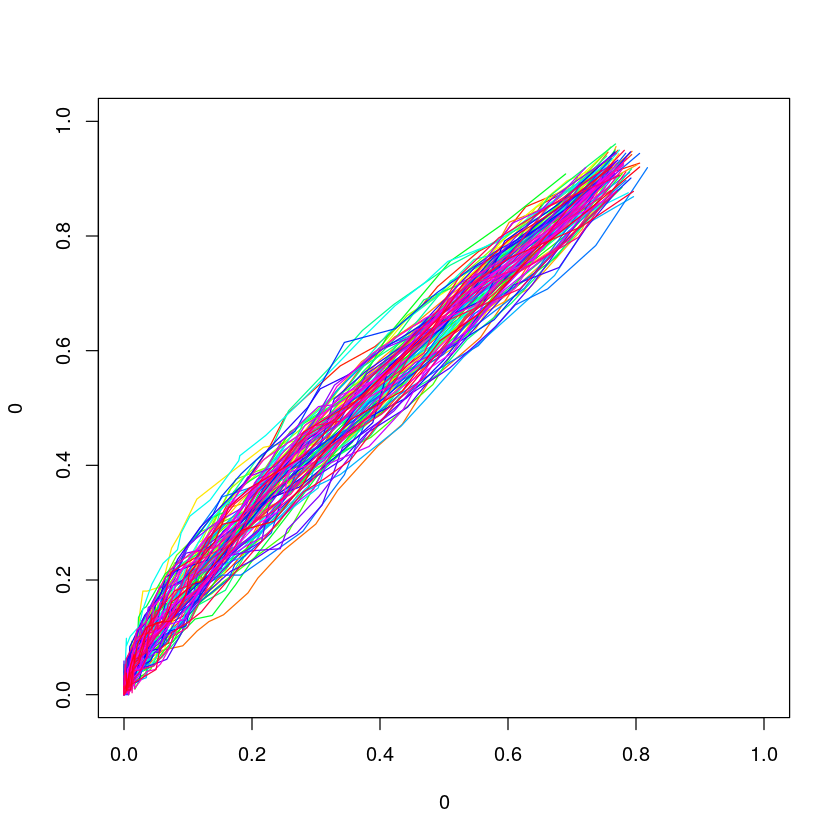

In [130]:
cl <- rainbow(replic_size)
plot(0,0,xlim = c(0.,1.),ylim = c(0.,1.),type = "n")
l2 <- 4 
m_fpr <- matrix(NA,replic_size, lam1_size)
m_tpr <- matrix(NA,replic_size, lam1_size)
for(s in 1:replic_size){
    fgl_fpr <- fgl_roc[[1]]$FPR[[s]]
    fgl_tpr <- fgl_roc[[1]]$TPR[[s]]
    fpr_sort <- sort(fgl_fpr[,l2])
    tpr_sort <- fgl_tpr[,l2][order(fgl_fpr[,l2])]
    lines(fpr_sort, tpr_sort,type="l",col=cl[s])
    m_fpr[s,] <- fpr_sort
    m_tpr[s,] <- tpr_sort
}

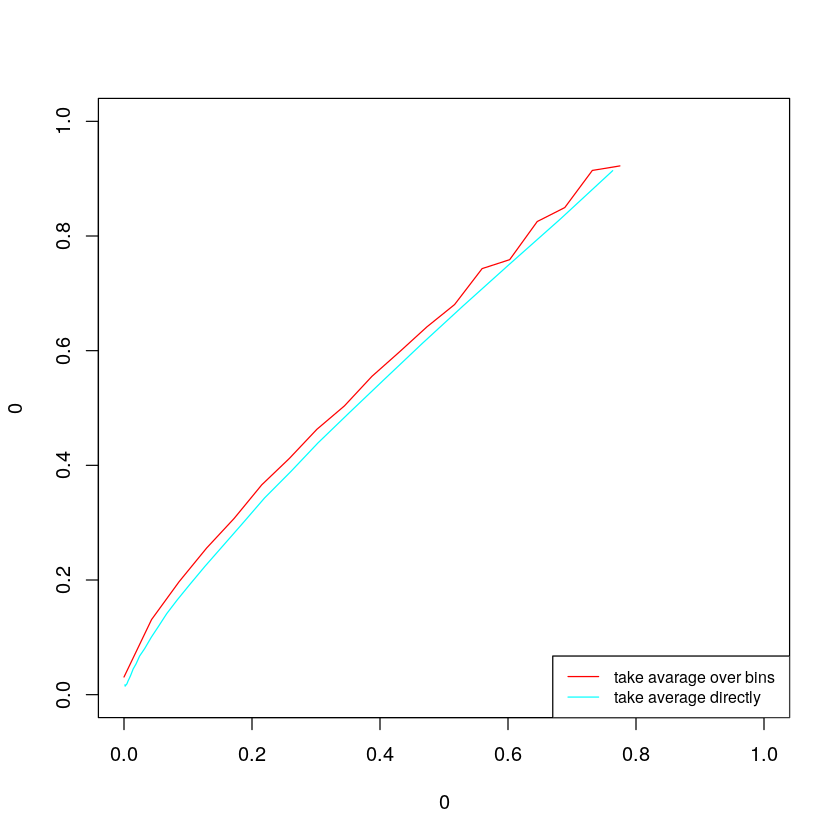

In [131]:
plot(0,0,xlim = c(0.,1.),ylim = c(0.,1.),type = "n")
cl <- rainbow(2)
#take average with bins 
s_fpr <- sort(m_fpr)
s_tpr <- m_tpr[order(m_fpr)]

bins_num <- 20
breaks <- seq(min(s_fpr),max(s_fpr), len=bins_num)
bins <- cut(s_fpr , breaks, include.lowest = T, right=FALSE)

b_fpr <- NULL
b_tpr <- NULL

for(i in 1:(bins_num-1)){
    if(summary(bins)[[i]]!=0){
        b_fpr <- c(b_fpr, breaks[i])
        b_tpr <- c(b_tpr, mean(s_tpr[which(findInterval(s_fpr, breaks)==i)],trim = 0.2))
    }
    
}
lines(b_fpr, b_tpr,type="l",col=cl[1])
#take average directly
d_fpr <- colMeans(m_fpr, na.rm = FALSE, dims = 1)
d_tpr <- colMeans(m_tpr, na.rm = FALSE, dims = 1)

lines(d_fpr, d_tpr,type="l",col=cl[2])

legend("bottomright", legend=c("take avarage over bins","take average directly"),
       col=c(cl), lty=1, cex=0.8)

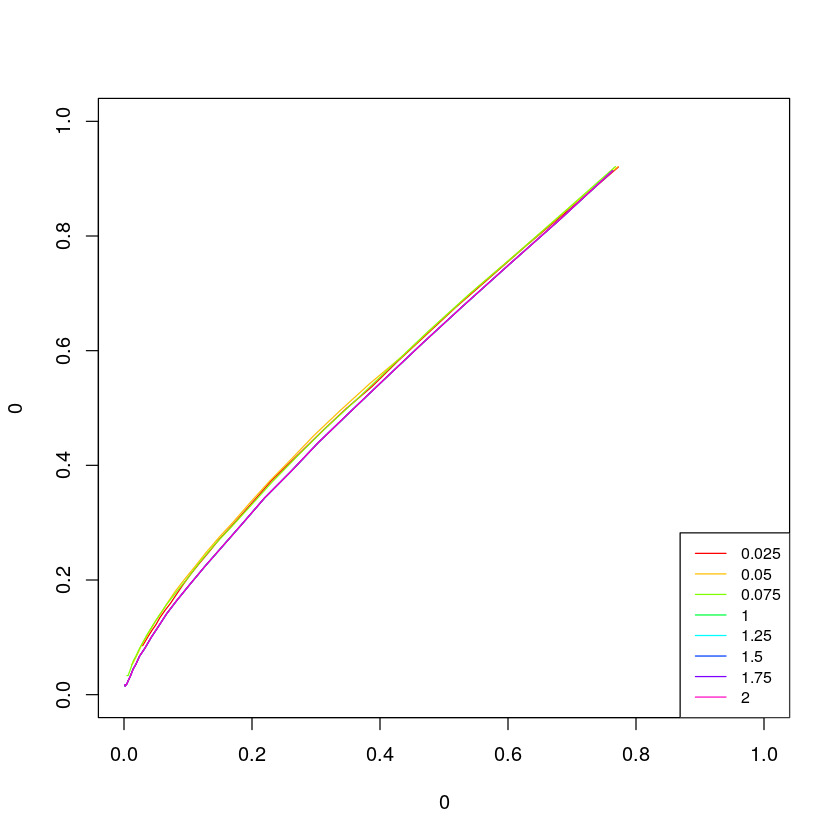

In [132]:
plot(0,0,xlim = c(0.,1.),ylim = c(0.,1.),type = "n")

cl <- rainbow(lam2_size)

for(l2 in 1:lam2_size){
    m_fpr <- matrix(NA,replic_size, lam1_size)
    m_tpr <- matrix(NA,replic_size, lam1_size)

    for(s in 1:replic_size){

        
        fgl_fpr <- fgl_roc[[1]]$FPR[[s]]
        fgl_tpr <- fgl_roc[[1]]$TPR[[s]]
        
        fpr_sort <- sort(fgl_fpr[,l2])
        tpr_sort <- fgl_tpr[,l2][order(fgl_fpr[,l2])]
        
        #lines(fpr_sort, tpr_sort,type="l",col=cl[s])
        m_fpr[s,] <- fpr_sort
        m_tpr[s,] <- tpr_sort
        
        d_fpr <- colMeans(m_fpr, na.rm = FALSE, dims = 1)
        d_tpr <- colMeans(m_tpr, na.rm = FALSE, dims = 1)
        lines(d_fpr, d_tpr,type="l",col=cl[l2])
    }
    
}

legend("bottomright", legend=c(.025, .05, .075, 1., 1.25, 1.5, 1.75, 2.0),
       col=c(cl), lty=1, cex=0.8)

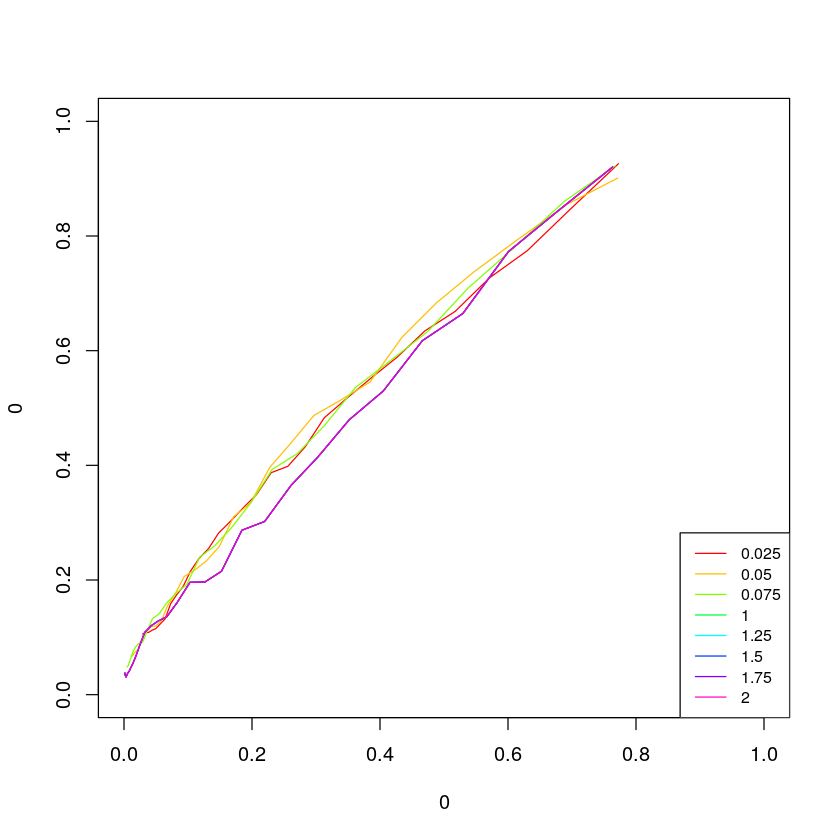

In [133]:
plot(0,0,xlim = c(0.,1.),ylim = c(0.,1.),type = "n")

cl <- rainbow(lam2_size)

for(l2 in 1:lam2_size){
    m_fpr <- matrix(NA,replic_size, lam1_size)
    m_tpr <- matrix(NA,replic_size, lam1_size)

    for(s in 1:replic_size){

        
        ggl_fpr <- ggl_roc[[1]]$FPR[[s]]
        ggl_tpr <- ggl_roc[[1]]$TPR[[s]]
        
        fpr_sort <- sort(ggl_fpr[,l2])
        tpr_sort <- fgl_tpr[,l2][order(ggl_fpr[,l2])]
        
        #lines(fpr_sort, tpr_sort,type="l",col=cl[s])
        m_fpr[s,] <- fpr_sort
        m_tpr[s,] <- tpr_sort
        
        d_fpr <- colMeans(m_fpr, na.rm = FALSE, dims = 1)
        d_tpr <- colMeans(m_tpr, na.rm = FALSE, dims = 1)
        lines(d_fpr, d_tpr,type="l",col=cl[l2])
    }
    
}

legend("bottomright", legend=c(.025, .05, .075, 1., 1.25, 1.5, 1.75, 2.0),
       col=c(cl), lty=1, cex=0.8)

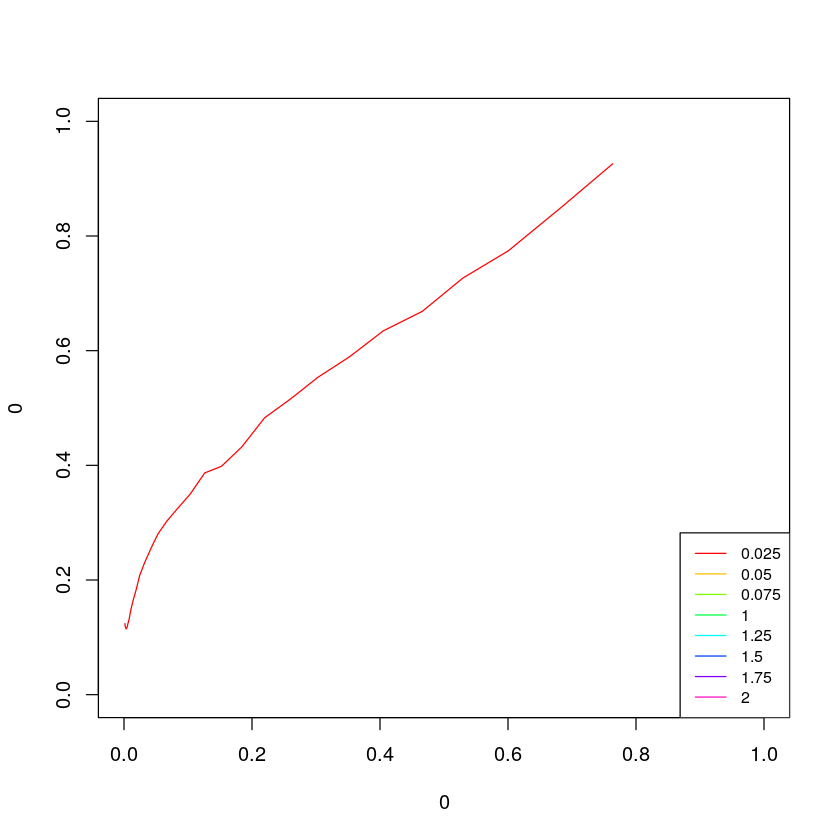

In [134]:
plot(0,0,xlim = c(0.,1.),ylim = c(0.,1.),type = "n")

cl <- rainbow(lam2_size)

m_fpr <- matrix(NA,replic_size, lam1_size)
m_tpr <- matrix(NA,replic_size, lam1_size)

for(s in 1:replic_size){


    gl_fpr <- gl_roc[[1]]$FPR[[s]]
    gl_tpr <- gl_roc[[1]]$TPR[[s]]

    fpr_sort <- sort(gl_fpr)
    tpr_sort <- fgl_tpr[order(gl_fpr)]

    #lines(fpr_sort, tpr_sort,type="l",col=cl[s])
    m_fpr[s,] <- fpr_sort
    m_tpr[s,] <- tpr_sort

    d_fpr <- colMeans(m_fpr, na.rm = FALSE, dims = 1)
    d_tpr <- colMeans(m_tpr, na.rm = FALSE, dims = 1)
    lines(d_fpr, d_tpr,type="l",col=cl[1])
}
    

legend("bottomright", legend=c(.025, .05, .075, 1., 1.25, 1.5, 1.75, 2.0),
       col=c(cl), lty=1, cex=0.8)